# 1. Import Libraries

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings

# 2. Get Data  

In [305]:
train = pd.read_csv('titanic_train.csv')

# 3. EDA

<AxesSubplot:>

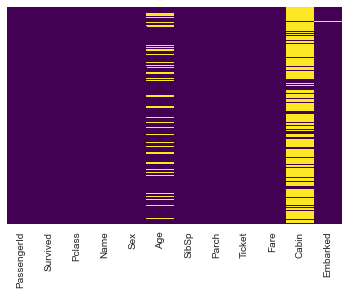

In [306]:
train.head()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #to ploot the columns vs null amounts

+ **From the above heatmap 'Age' columns have some null values, while 'Cabin' column have very high amount of null values**

<AxesSubplot:xlabel='Survived', ylabel='count'>

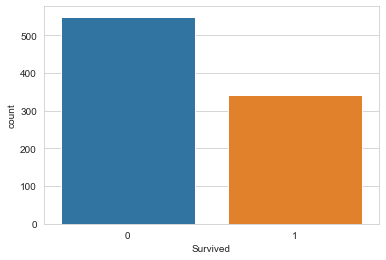

In [307]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

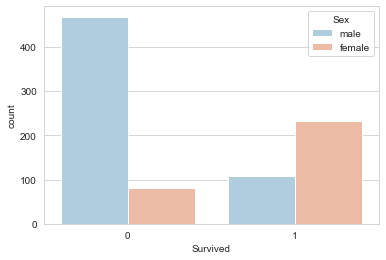

In [308]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

+ **|Female survival rate is higher than male**

<AxesSubplot:xlabel='Survived', ylabel='count'>

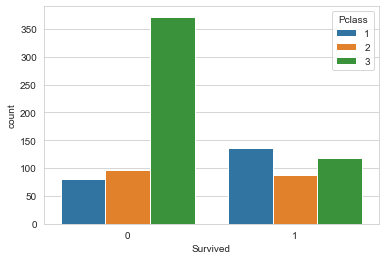

In [309]:
sns.countplot(x='Survived',hue='Pclass',data=train)

+ **Passengers from Pclass1 have higher survival rate, while passengers from Pclass3 have the least survival rate**

<AxesSubplot:ylabel='Frequency'>

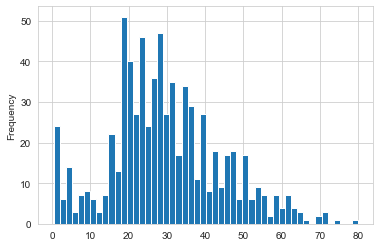

In [310]:
train['Age'].plot.hist(bins=50) #also can plot using seaborn --> sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [311]:
train.info() #to see all the columns,null counts,data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [312]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ **'Age'** ,**'Cabin'** and **'Embarked'** columns have null values.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

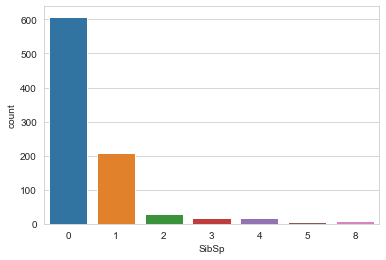

In [313]:
sns.countplot(x='SibSp',data=train)

+ **The passengers who board alone are highest**

# 4. Data Cleaning

In [314]:
from pylab import *
rcParams['figure.figsize'] = 10,7

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

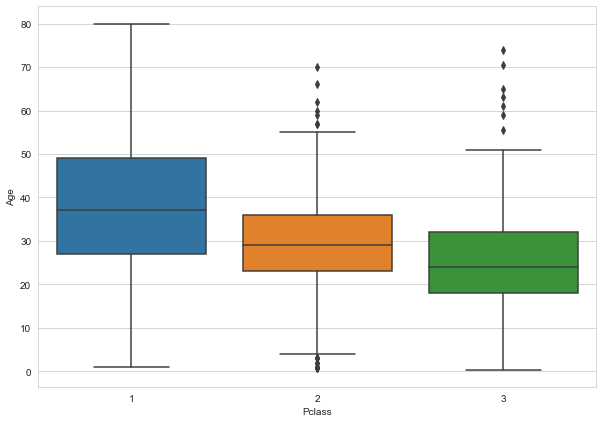

In [315]:
sns.boxplot(x='Pclass', y='Age',data=train)

+ **Pclass1 is more aged groups of passengers while Pclass3 is young group of passengers**

## 4.1 Imputation for 'Age' columns


In [316]:
#Substituting null value in 'Age' columns with means but also relating the mean value with the Pclass 
# defining function for substitution of null value with means

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age): #check for null value
        if Pclass ==1:  #apply conditions for diff Pclass and returning the mean respectively
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
        

<AxesSubplot:>

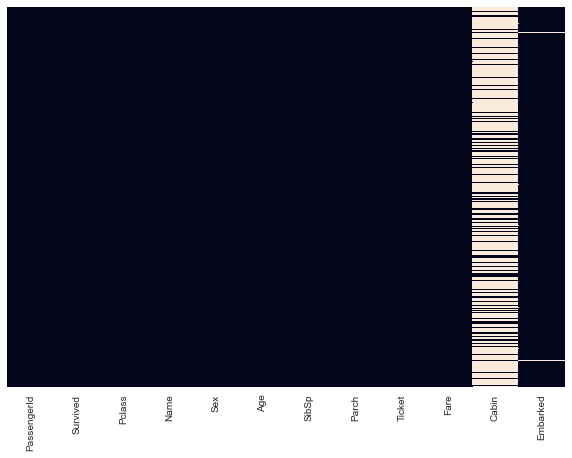

In [317]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

+ **The 'Age' columns have no more nulls**

## 4.2 Dropping Missing Value rows

In [318]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [319]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## 4.3 Dummy Variables

In [320]:
#Categorical column changed into dummy variable

sex = pd.get_dummies(train['Sex'],drop_first=True) # drop_first will avoid Multicollinearity 

In [321]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [322]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## 4.4 Remove Unwanted columns

In [323]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True) #Sex, Embarked already created dummy so the old one nonid


In [324]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# 5. Train the Model

In [325]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [326]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [327]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# 6.Evaluation of Model

In [329]:
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       159
           1       0.77      0.43      0.55       109

    accuracy                           0.72       268
   macro avg       0.74      0.67      0.67       268
weighted avg       0.73      0.72      0.69       268

[[145  14]
 [ 62  47]]
